# Regression Analysis

###  房屋數據集
#### 包含了506個樣本，每個樣本有14個特徵
#### CRIM：城鎮的人均犯罪率
#### ZN：大於25,000平方英尺的住宅用地的比例。 
#### INDUS：城鎮的非零售業商業土地的比例
#### CHAS：這是查爾斯河虛擬變量（如果某區域以河道為界屬性為1;否則為0）
#### NOX：這是一氧化氮濃度（ 10ppm）
#### RM：這是每個住宅的平均房間數
#### 年齡：這是在1940年之前建的房屋單位的比例
#### DIS：這是到波士頓五個就業中心的加權距離
#### RAD：這是使用高速公路的方便性指數
#### TAX：這是財產稅率( $10,000$)
#### PTRATIO：這是城鎮的學生 - 教師比率
#### B：這是用1000（Bk - 0.63）^ 2算出，其中Bk是城鎮中非裔的比例
#### LSTAT：低社經人口比例
#### MEDV：自用宅的房價($ 1000)


###  要利用前面十三個變數(或許不用全部使用)  預測房價 

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.shape

(506, 14)

## 視覺化部分的特徵

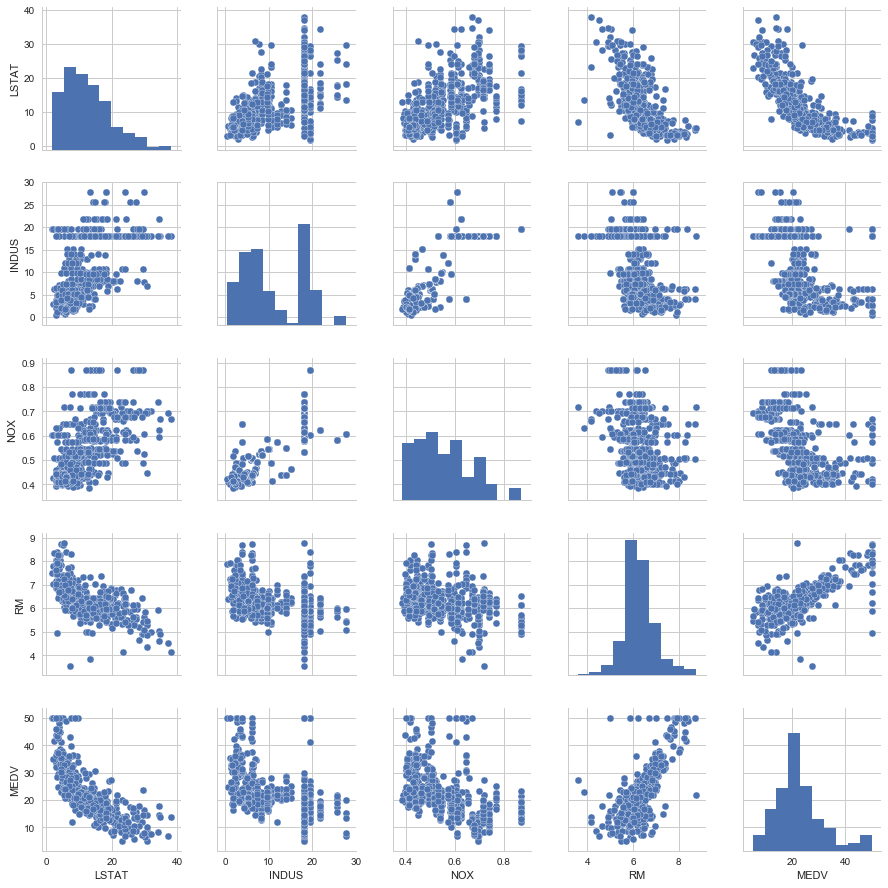

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

#cols = ['CRIM','LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 利用 pairplot 繪製下列 散佈圖 
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

plt.show()

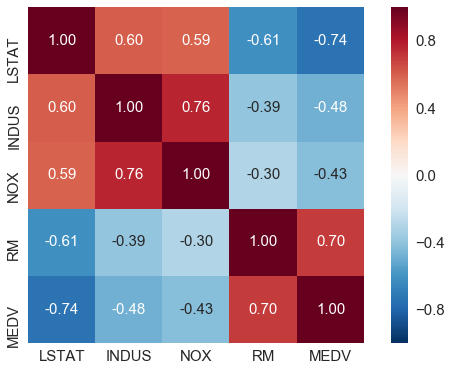

In [4]:
import numpy as np
#計算相關性
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

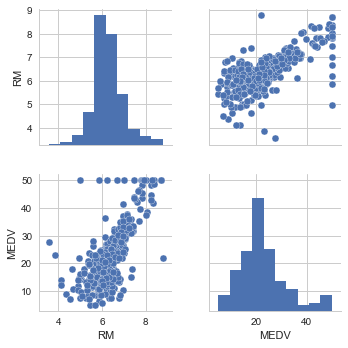

In [5]:
sns.set(style='whitegrid', context='notebook')
cols = ['RM', 'MEDV']


sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

plt.show()

## 實作一個最小平方法的線性迴歸模型 利用RM(住宅的房間數) 預測MEDV(房價)

### 使用梯度下降法 gradient descent實作


In [6]:
#實作一個 class 
class LinearRegressionGD(object):
#初始化方法  已設定  學習率 & 最大跌代次數
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
X = df[['RM']].values
y = df['MEDV'].values

In [8]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [9]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

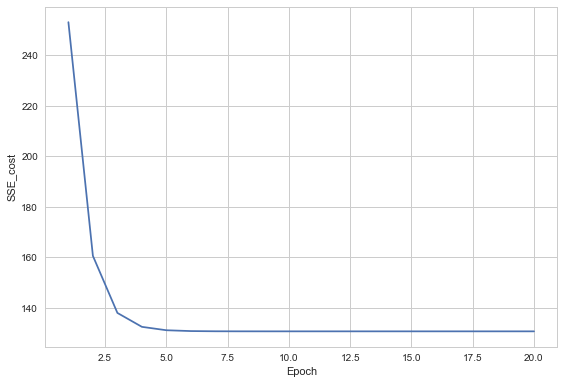

In [10]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE_cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

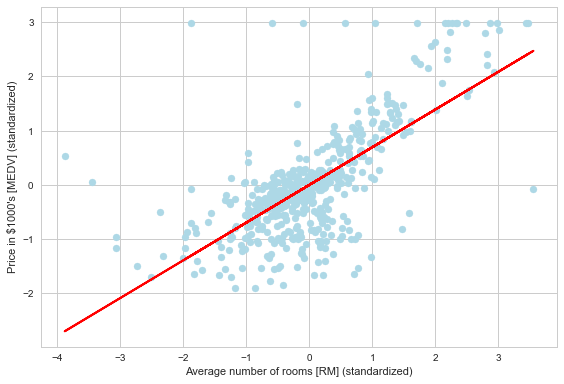

In [12]:

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

In [13]:

print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

# 數據標準化後  y截距永遠是0

Slope: 0.695
Intercept: -0.000


In [14]:
# 有五個房間的房子
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


## 用scikit-learn實作


In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
#不用自己標準化　函式已經做好了
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


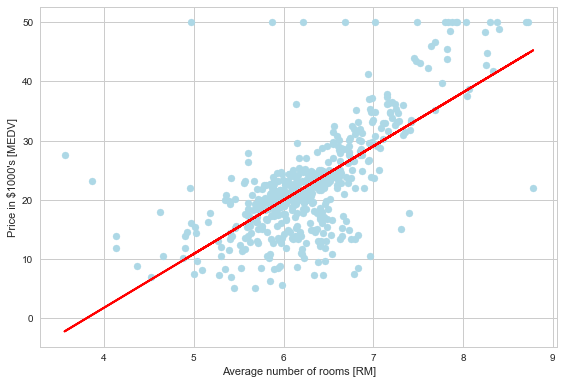

In [17]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()


In [18]:
slr.predict(5)

array([ 10.83992413])